In [75]:
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import Markdown as md
import pandas as pd

InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

time_zone = 'Asia/Jakarta'

In [76]:
import data_source
import yfinance as yf
from datetime import datetime, timedelta

In [77]:
tickers_sheet = 'tickers'
tickers = pd.read_excel('output_preprocessing.xlsx', sheet_name=tickers_sheet)

In [78]:
start_date = '2019-08-14'
event_date = '2019-08-30'
end_date = '2019-09-29'

start_time = datetime.strptime(start_date, '%Y-%m-%d')
end_time = datetime.strptime(end_date, '%Y-%m-%d')

In [79]:
def generate_returns_of_market(start_time: datetime, end_time: datetime) -> pd.DataFrame:
    market_ticker = data_source.ticker_market
    market = yf.Ticker(ticker=market_ticker)

    result = market.history(start=start_time, end=end_time)
    returns_of_market = result['Close'].pct_change()[1:].to_frame()

    return_column_name = "return"
    first_column_name = returns_of_market.columns[0]
    returns_of_market.rename(columns={first_column_name: return_column_name}, inplace=True)

    return returns_of_market

In [80]:
returns_of_market = generate_returns_of_market(start_time=start_time, end_time=end_time)
returns_of_market

,return
Date,
2022-11-15 00:00:00+07:00,0.002295
2022-11-16 00:00:00+07:00,-0.003001
2022-11-17 00:00:00+07:00,0.004363
2022-11-18 00:00:00+07:00,0.005280
2022-11-21 00:00:00+07:00,-0.002673
2022-11-22 00:00:00+07:00,-0.004624
2022-11-23 00:00:00+07:00,0.003348
2022-11-24 00:00:00+07:00,0.003741
2022-11-25 00:00:00+07:00,-0.003865


In [81]:
def generate_stock_prices(start_time: datetime, end_time: datetime, tickers: pd.DataFrame, is_more_related: bool) -> pd.DataFrame:
    classified_tickers_list = tickers[tickers['is_more_related'] == is_more_related]['ticker'].to_list()

    tickers_prices = yf.download(tickers=classified_tickers_list, start=start_time, end=end_time)
    tickers_close_prices = tickers_prices['Close'].dropna(axis=1)

    return tickers_close_prices

In [82]:
is_more_related = True
tickers_stock_prices = generate_stock_prices(start_time=start_time, end_time=end_time, tickers=tickers, is_more_related=is_more_related)
tickers_stock_prices

[*********************100%***********************]  357 of 357 completed


,AALI.JK,ABMM.JK,ACST.JK,ADES.JK,ADHI.JK,ADMG.JK,ADRO.JK,AGII.JK,AIMS.JK,AISA.JK,AKPI.JK,AKRA.JK,ALDO.JK,ALKA.JK,ALMI.JK,ALTO.JK,AMFG.JK,AMIN.JK,AMRT.JK,ANDI.JK,ANJT.JK,ANTM.JK,APEX.JK,APII.JK,APLI.JK,APLN.JK,ARII.JK,ARMY.JK,ARNA.JK,ARTI.JK,ASGR.JK,ASII.JK,ASRI.JK,BAJA.JK,BALI.JK,BAPA.JK,BBRM.JK,BCIP.JK,BEST.JK,BHIT.JK,BIKA.JK,BIPI.JK,BIPP.JK,BISI.JK,BKDP.JK,BKSL.JK,BMSR.JK,BMTR.JK,BNBR.JK,BOSS.JK,BRMS.JK,BRNA.JK,BRPT.JK,BSDE.JK,BSSR.JK,BTEK.JK,BTEL.JK,BTON.JK,BUDI.JK,BUKK.JK,BULL.JK,BUMI.JK,BWPT.JK,BYAN.JK,CAKK.JK,CAMP.JK,CANI.JK,CASS.JK,CEKA.JK,CENT.JK,CITA.JK,CITY.JK,CLEO.JK,CLPI.JK,CMNP.JK,CNKO.JK,COWL.JK,CPIN.JK,CPRO.JK,CSIS.JK,CTBN.JK,CTRA.JK,CTTH.JK,DART.JK,DAYA.JK,DEWA.JK,DGIK.JK,DILD.JK,DKFT.JK,DLTA.JK,DMAS.JK,DOID.JK,DPNS.JK,DPUM.JK,DSFI.JK,DSNG.JK,DSSA.JK,DUTI.JK,DWGL.JK,DYAN.JK,EKAD.JK,ELSA.JK,ELTY.JK,EMDE.JK,ENRG.JK,EPMT.JK,ESSA.JK,ETWA.JK,EXCL.JK,FASW.JK,FIRE.JK,FISH.JK,FMII.JK,FORZ.JK,FPNI.JK,FREN.JK,GAMA.JK,GDST.JK,GEMS.JK,GGRM.JK,GHON.JK,GMFI.JK,GMTD.JK,GOLD.JK,GOLL.JK,GOOD.JK,GPRA.JK,GTBO.JK,GWSA.JK,GZCO.JK,HADE.JK,HERO.JK,HEXA.JK,HITS.JK,HKMU.JK,HMSP.JK,HOKI.JK,HRUM.JK,IATA.JK,IBST.JK,ICBP.JK,ICON.JK,IDPR.JK,IGAR.JK,IKBI.JK,IMPC.JK,INAI.JK,INCF.JK,INCI.JK,INCO.JK,INDF.JK,INDX.JK,INDY.JK,INKP.JK,INPP.JK,INPS.JK,INRU.JK,INTA.JK,INTD.JK,INTP.JK,IPCC.JK,IPCM.JK,IPOL.JK,ISAT.JK,ISSP.JK,ITMA.JK,ITMG.JK,JAWA.JK,JECC.JK,JKON.JK,JKSW.JK,JPFA.JK,JRPT.JK,JSKY.JK,JSMR.JK,JTPE.JK,KARW.JK,KBLI.JK,KBLM.JK,KBLV.JK,KBRI.JK,KDSI.JK,KIAS.JK,KIJA.JK,KINO.JK,KKGI.JK,KMTR.JK,KOBX.JK,KOIN.JK,KONI.JK,KOPI.JK,KPAL.JK,KPAS.JK,KRAH.JK,KRAS.JK,LAND.JK,LAPD.JK,LCGP.JK,LCKM.JK,LEAD.JK,LINK.JK,LION.JK,LMSH.JK,LPCK.JK,LPKR.JK,LPLI.JK,LSIP.JK,LTLS.JK,MAGP.JK,MAIN.JK,MARK.JK,MBAP.JK,MBSS.JK,MBTO.JK,MDKA.JK,MDKI.JK,MDLN.JK,MDRN.JK,MEDC.JK,META.JK,MFMI.JK,MGRO.JK,MIDI.JK,MITI.JK,MKPI.JK,MLBI.JK,MLIA.JK,MLPL.JK,MMLP.JK,MOLI.JK,MPOW.JK,MPPA.JK,MPRO.JK,MRAT.JK,MTFN.JK,MTLA.JK,MTRA.JK,MTSM.JK,MYOH.JK,MYOR.JK,MYRX.JK,NIKL.JK,NIRO.JK,NRCA.JK,OASA.JK,OKAS.JK,OMRE.JK,PALM.JK,PANI.JK,PBID.JK,PBSA.JK,PCAR.JK,PGAS.JK,PICO.JK,PKPK.JK,PLIN.JK,POLL.JK,PORT.JK,POWR.JK,PPRE.JK,PPRO.JK,PSAB.JK,PSDN.JK,PSSI.JK,PTBA.JK,PTIS.JK,PTPP.JK,PTRO.JK,PUDP.JK,PWON.JK,RAJA.JK,RANC.JK,RBMS.JK,RDTX.JK,RIGS.JK,RIMO.JK,RISE.JK,RMBA.JK,RODA.JK,ROTI.JK,RUIS.JK,SATU.JK,SCCO.JK,SDPC.JK,SGRO.JK,SHIP.JK,SIMA.JK,SIMP.JK,SIPD.JK,SKBM.JK,SKLT.JK,SKRN.JK,SMAR.JK,SMBR.JK,SMCB.JK,SMDM.JK,SMGR.JK,SMMT.JK,SMRA.JK,SMRU.JK,SOCI.JK,SOSS.JK,SPMA.JK,SPTO.JK,SQMI.JK,SRSN.JK,SSIA.JK,SSMS.JK,STTP.JK,SULI.JK,SUPR.JK,SURE.JK,SWAT.JK,TALF.JK,TAMU.JK,TARA.JK,TBIG.JK,TBLA.JK,TBMS.JK,TCID.JK,TCPI.JK,TDPM.JK,TGKA.JK,TGRA.JK,TINS.JK,TIRA.JK,TIRT.JK,TKIM.JK,TLKM.JK,TOBA.JK,TOPS.JK,TOTL.JK,TOTO.JK,TOWR.JK,TPIA.JK,TPMA.JK,TRAM.JK,TRST.JK,ULTJ.JK,UNIC.JK,UNSP.JK,UNTR.JK,UNVR.JK,URBN.JK,VOKS.JK,WAPO.JK,WEGE.JK,WICO.JK,WIIM.JK,WIKA.JK,WINS.JK,WSBP.JK,WSKT.JK,WTON.JK,YPAS.JK,ZBRA.JK,ZINC.JK
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-11-14,8375.0,3030.0,179.0,7325.0,535.0,156.0,3500.0,2120.0,224.0,171.0,1400.0,1385.0,835.0,286.0,282.0,148.0,5900.0,145.0,2640.0,50.0,715.0,2120.0,334.0,199.0,196.0,164.0,300.0,50.0,1000.0,50.0,970.0,6300.0,173.0,142.0,800.0,126.0,55.0,55.0,140.0,60.0,126.0,143.0,50.0,1635.0,88.0,50.0,635.0,304.0,68.0,61.0,185.0,1190.0,806.603760,930.0,3870.0,50.0,50.0,430.0,208.0,1080.0,164.0,180.0,69.0,7305.0,234.0,290.0,79.0,420.0,1980.0,139.0,2990.0,143.0,635.0,955.0,1775.0,50.0,50.0,5800.0,58.0,75.0,1685.0,955.0,50.0,187.0,228.0,59.0,112.0,177.0,122.0,3870.0,163.0,364.0,390.0,50.0,92.0,615.0,39900.0,3970.0,208.0,102.0,272.0,350.0,50.0,134.0,340.0,2740.0,1035.0,258.0,2400.000000,6250.0,288.0,7375.0,266.781799,50.0,212.0,78.0,50.0,214.0,6800.0,21425.0,1920.0,68.0,14500.0,330.0,50

In [83]:
def calculate_tickers_return(tickers_stock_prices: pd.DataFrame) -> pd.DataFrame:
    tickers_return = tickers_stock_prices.pct_change()[1:]
    return tickers_return

In [84]:
tickers_return = calculate_tickers_return(tickers_stock_prices=tickers_stock_prices)
tickers_return

,AALI.JK,ABMM.JK,ACST.JK,ADES.JK,ADHI.JK,ADMG.JK,ADRO.JK,AGII.JK,AIMS.JK,AISA.JK,AKPI.JK,AKRA.JK,ALDO.JK,ALKA.JK,ALMI.JK,ALTO.JK,AMFG.JK,AMIN.JK,AMRT.JK,ANDI.JK,ANJT.JK,ANTM.JK,APEX.JK,APII.JK,APLI.JK,APLN.JK,ARII.JK,ARMY.JK,ARNA.JK,ARTI.JK,ASGR.JK,ASII.JK,ASRI.JK,BAJA.JK,BALI.JK,BAPA.JK,BBRM.JK,BCIP.JK,BEST.JK,BHIT.JK,BIKA.JK,BIPI.JK,BIPP.JK,BISI.JK,BKDP.JK,BKSL.JK,BMSR.JK,BMTR.JK,BNBR.JK,BOSS.JK,BRMS.JK,BRNA.JK,BRPT.JK,BSDE.JK,BSSR.JK,BTEK.JK,BTEL.JK,BTON.JK,BUDI.JK,BUKK.JK,BULL.JK,BUMI.JK,BWPT.JK,BYAN.JK,CAKK.JK,CAMP.JK,CANI.JK,CASS.JK,CEKA.JK,CENT.JK,CITA.JK,CITY.JK,CLEO.JK,CLPI.JK,CMNP.JK,CNKO.JK,COWL.JK,CPIN.JK,CPRO.JK,CSIS.JK,CTBN.JK,CTRA.JK,CTTH.JK,DART.JK,DAYA.JK,DEWA.JK,DGIK.JK,DILD.JK,DKFT.JK,DLTA.JK,DMAS.JK,DOID.JK,DPNS.JK,DPUM.JK,DSFI.JK,DSNG.JK,DSSA.JK,DUTI.JK,DWGL.JK,DYAN.JK,EKAD.JK,ELSA.JK,ELTY.JK,EMDE.JK,ENRG.JK,EPMT.JK,ESSA.JK,ETWA.JK,EXCL.JK,FASW.JK,FIRE.JK,FISH.JK,FMII.JK,FORZ.JK,FPNI.JK,FREN.JK,GAMA.JK,GDST.JK,GEMS.JK,GGRM.JK,GHON.JK,GMFI.JK,GMTD.JK,GOLD.JK,GOLL.JK,GOOD.JK,GPRA.JK,GTBO.JK,GWSA.JK,GZCO.JK,HADE.JK,HERO.JK,HEXA.JK,HITS.JK,HKMU.JK,HMSP.JK,HOKI.JK,HRUM.JK,IATA.JK,IBST.JK,ICBP.JK,ICON.JK,IDPR.JK,IGAR.JK,IKBI.JK,IMPC.JK,INAI.JK,INCF.JK,INCI.JK,INCO.JK,INDF.JK,INDX.JK,INDY.JK,INKP.JK,INPP.JK,INPS.JK,INRU.JK,INTA.JK,INTD.JK,INTP.JK,IPCC.JK,IPCM.JK,IPOL.JK,ISAT.JK,ISSP.JK,ITMA.JK,ITMG.JK,JAWA.JK,JECC.JK,JKON.JK,JKSW.JK,JPFA.JK,JRPT.JK,JSKY.JK,JSMR.JK,JTPE.JK,KARW.JK,KBLI.JK,KBLM.JK,KBLV.JK,KBRI.JK,KDSI.JK,KIAS.JK,KIJA.JK,KINO.JK,KKGI.JK,KMTR.JK,KOBX.JK,KOIN.JK,KONI.JK,KOPI.JK,KPAL.JK,KPAS.JK,KRAH.JK,KRAS.JK,LAND.JK,LAPD.JK,LCGP.JK,LCKM.JK,LEAD.JK,LINK.JK,LION.JK,LMSH.JK,LPCK.JK,LPKR.JK,LPLI.JK,LSIP.JK,LTLS.JK,MAGP.JK,MAIN.JK,MARK.JK,MBAP.JK,MBSS.JK,MBTO.JK,MDKA.JK,MDKI.JK,MDLN.JK,MDRN.JK,MEDC.JK,META.JK,MFMI.JK,MGRO.JK,MIDI.JK,MITI.JK,MKPI.JK,MLBI.JK,MLIA.JK,MLPL.JK,MMLP.JK,MOLI.JK,MPOW.JK,MPPA.JK,MPRO.JK,MRAT.JK,MTFN.JK,MTLA.JK,MTRA.JK,MTSM.JK,MYOH.JK,MYOR.JK,MYRX.JK,NIKL.JK,NIRO.JK,NRCA.JK,OASA.JK,OKAS.JK,OMRE.JK,PALM.JK,PANI.JK,PBID.JK,PBSA.JK,PCAR.JK,PGAS.JK,PICO.JK,PKPK.JK,PLIN.JK,POLL.JK,PORT.JK,POWR.JK,PPRE.JK,PPRO.JK,PSAB.JK,PSDN.JK,PSSI.JK,PTBA.JK,PTIS.JK,PTPP.JK,PTRO.JK,PUDP.JK,PWON.JK,RAJA.JK,RANC.JK,RBMS.JK,RDTX.JK,RIGS.JK,RIMO.JK,RISE.JK,RMBA.JK,RODA.JK,ROTI.JK,RUIS.JK,SATU.JK,SCCO.JK,SDPC.JK,SGRO.JK,SHIP.JK,SIMA.JK,SIMP.JK,SIPD.JK,SKBM.JK,SKLT.JK,SKRN.JK,SMAR.JK,SMBR.JK,SMCB.JK,SMDM.JK,SMGR.JK,SMMT.JK,SMRA.JK,SMRU.JK,SOCI.JK,SOSS.JK,SPMA.JK,SPTO.JK,SQMI.JK,SRSN.JK,SSIA.JK,SSMS.JK,STTP.JK,SULI.JK,SUPR.JK,SURE.JK,SWAT.JK,TALF.JK,TAMU.JK,TARA.JK,TBIG.JK,TBLA.JK,TBMS.JK,TCID.JK,TCPI.JK,TDPM.JK,TGKA.JK,TGRA.JK,TINS.JK,TIRA.JK,TIRT.JK,TKIM.JK,TLKM.JK,TOBA.JK,TOPS.JK,TOTL.JK,TOTO.JK,TOWR.JK,TPIA.JK,TPMA.JK,TRAM.JK,TRST.JK,ULTJ.JK,UNIC.JK,UNSP.JK,UNTR.JK,UNVR.JK,URBN.JK,VOKS.JK,WAPO.JK,WEGE.JK,WICO.JK,WIIM.JK,WIKA.JK,WINS.JK,WSBP.JK,WSKT.JK,WTON.JK,YPAS.JK,ZBRA.JK,ZINC.JK
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-11-15,-0.008955,0.069307,0.011173,0.006826,-0.018692,-0.006410,0.002857,0.033019,0.008929,0.005848,0.025000,0.025271,0.005988,-0.027972,0.007092,-0.006757,-0.012712,-0.006897,0.045455,0.0,0.006993,0.018868,-0.005988,0.005025,-0.010204,-0.018293,0.000000,0.0,0.000000,0.0,-0.015464,-0.011905,-0.017341,-0.028169,0.006250,0.063492,-0.018182,0.018182,-0.014286,0.016667,-0.055556,0.041958,0.000000,0.015291,-0.022727,0.0,-0.007874,0.013158,-0.014706,-0.016393,-0.027027,-0.012605,0.030864,0.005376,0.007752,0.0,0.0,0.018605,-0.009615,0.000000,0.018293,-0.022222,0.014493,0.006160,-0.025641,0.000000,0.050633,-0.023810,0.000000,-0.007194,-0.016722,0.013986,-0.015748,-0.005236,0.002817,0.0,0.0,0.004310,0.017241,0.013333,-0.002967,0.010471,0.0,-0.010695,-0.017544,-0.016949,0.0000

In [87]:
factor = 30

def select_winner_and_loser_tickers(tickers_stock_prices: pd.DataFrame, event_date: str) -> tuple[pd.DataFrame, pd.DataFrame]:
    event_timestamp = pd.Timestamp(f'{event_date} 00:00:00')

    initial_stock_price_series = tickers_stock_prices.iloc[1]
    event_stock_price_series = tickers_stock_prices.loc[event_timestamp]
    formation_return_rate_series =  (event_stock_price_series - initial_stock_price_series) / initial_stock_price_series
    formation_return_rate_series = formation_return_rate_series.sort_values(ascending=False)
    

    winners_series = formation_return_rate_series[:factor]
    losers_series = formation_return_rate_series[-factor:]

    winner_tickers_list = winners_series.index.to_list()
    loser_tickers_list = losers_series.index.to_list()

    winner_tickers_return = tickers_return[winner_tickers_list]
    loser_tickers_return = tickers_return[loser_tickers_list]

    return winner_tickers_return, loser_tickers_return


In [88]:
winner_tickers_return, loser_tickers_return = select_winner_and_loser_tickers(tickers_stock_prices=tickers_stock_prices, event_date=event_date)
winner_tickers_return
loser_tickers_return

,YPAS.JK,BMSR.JK,BYAN.JK,LINK.JK,SDPC.JK,SHIP.JK,NIKL.JK,CITA.JK,MRAT.JK,WAPO.JK,MPPA.JK,OKAS.JK,BIPI.JK,MIDI.JK,DAYA.JK,BUMI.JK,KARW.JK,APLN.JK,BSSR.JK,ITMG.JK,ADRO.JK,BUDI.JK,FPNI.JK,CMNP.JK,IMPC.JK,BAJA.JK,PTBA.JK,IPCC.JK,MBAP.JK,SKLT.JK
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-11-15,0.046154,-0.007874,0.006160,0.003322,0.000000,-0.017857,0.034014,-0.016722,-0.023077,0.056818,-0.030864,-0.007407,0.041958,0.027397,-0.017544,-0.022222,0.023256,-0.018293,0.007752,0.018194,0.002857,-0.009615,-0.018868,0.002817,0.058461,-0.028169,0.005747,-0.008475,0.014599,-0.012953
2022-11-16,0.250000,0.000000,0.033673,-0.016556,0.343750,0.048485,0.098684,0.020408,0.000000,0.010753,0.146497,0.000000,-0.013423,0.023333,0.035714,0.000000,0.090909,0.006211,0.046154,0.005956,0.017094,0.000000,0.000000,-0.014045,0.000000,0.065217,0.000000,0.000000,0.043165,0.002625
2022-11-17,-0.064706,0.087302,0.105298,0.067340,-0.069767,-0.040462,-0.023952,-0.003333,-0.031496,0.026596,-0.011111,0.067164,-0.013605,0.035831,-0.008621,-0.005682,-0.041667,0.024691,-0.029412,0.000658,0.005602,0.009709,0.009615,0.000000,0.017442,0.000000,0.014286,0.000000,-0.024138,0.020942
2022-11-18,0.245283,-0.007299,0.027687,0.041009,-0.068750,0.012048,0.049080,0.110368,0.089431,-0.005181,-0.005618,-0.020979,0.055172,0.000000,0.008696,0.034286,-0.021739,-0.012048,0.005051,0.010519,0.000000,0.000000,0.009524,0.000000,0.028571,-0.006803,0.000000,0.008547,0.010601,0.015385
2022-11-21,-0.065657,0.250000,0.066049,0.081818,0.006711,0.119048,0.011696,0.006024,0.052239,0.072917,-0.028249,0.035714,0.045752,0.003145,0.025862,0.027624,0.033333,0.036585,0.032663,0.034483,0.027855,0.038462,0.028302,0.059829,-0.002778,-0.013699,0.028169,0.033898,0.010490,0.000000
2022-11-22,-0.064865,0.058824,0.005978,0.002801,-0.020000,-0.031915,-0.046243,0.017964,0.035461,0.242718,0.040698,-0.020690,0.112500,0.000000,-0.016807,0.010753,-0.021505,-0.005882,0.043796,0.043396,0.002710,-0.009259,0.000000,0.008065,0.027855,0.159722,0.010959,0.000000,0.034602,-0.015152
2022-11-23,-0.069364,0.000000,0.021070,-0.069832,0.102041,-0.016484,-0.036364,-0.055882,0.000000,-0.062500,-0.011173,0.000000,0.011236,-0.025078,-0.008547,0.037234,0.032967,0.005917,0.011655,-0.002411,0.013514,0.000000,0.009174,0.016000,-0.010840,-0.065868,0.002710,0.000000,-0.003344,0.000000
2022-11-24,-0.068323,-0.033333,-0.015873,-0.069069,-0.018519,-0.055866,-0.031447,-0.012461,0.075342,-0.033333,0.067797,-0.007042,-0.044444,0.006431,0.008621,-0.030769,-0.031915,-0.005882,-0.032258,0.006647,0.000000,0.009346,0.072727,-0.026247,-0.019178,-0.032051,-0.002703,0.057377,-0.006711,0.000000
2022-11-25,-0.066667,-0.022989,-0.016667,0.000000,0.000000,-0.029586,-0.038961,0.000000,0.089172,-0.068966,0.047619,0.000000,0.017442,0.015974,-0.025641,-0.021164,0.021978,-0.017751,0.016667,-0.017407,-0.005333,0.000000,-0.016949,0.024259,0.000000,-0.013245,-0.013550,-0.007752,-0.013514,0.000000


,TCPI.JK,CPRO.JK,STTP.JK,BAPA.JK,PUDP.JK,BISI.JK,MTSM.JK,UNIC.JK,SSIA.JK,BRNA.JK,BULL.JK,POLL.JK,KOPI.JK,MEDC.JK,SATU.JK,TINS.JK,IPOL.JK,GDST.JK,PICO.JK,WINS.JK,ANTM.JK,INTD.JK,OMRE.JK,PKPK.JK,HITS.JK,FIRE.JK,LEAD.JK,OASA.JK,PORT.JK,EXCL.JK
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-11-15,-0.056790,0.017241,0.000000,0.063492,-0.056122,0.015291,0.090323,0.030588,0.081081,-0.012605,0.018293,0.067485,0.160305,-0.017241,-0.025641,0.000000,-0.005952,0.112150,-0.069307,-0.058824,0.018868,0.080000,-0.030837,-0.028986,0.008130,-0.069444,-0.025000,-0.039409,-0.058333,-0.004167
2022-11-16,-0.026178,-0.016949,0.000000,-0.029851,0.070270,-0.012048,-0.035503,0.002283,-0.012500,-0.038298,-0.023952,-0.068966,0.013158,0.017544,-0.039474,-0.038062,-0.047904,-0.050420,-0.068085,-0.005208,-0.060185,0.015873,-0.040909,-0.067164,-0.040323,-0.067164,0.034188,-0.046154,0.004425,-0.054393
2022-11-17,0.008065,-0.017241,0.000000,0.000000,-0.050505,-0.012195,-0.030675,-0.043280,0.012658,0.022124,-0.018405,0.018519,-0.006494,-0.025862,-0.013699,-0.010791,0.000000,0.008850,-0.068493,-0.010471,-0.027094,0.015625,-0.052133,-0.056000,0.008403,-0.024000,-0.049587,-0.069892,-0.066079,0.017699
2022-11-18,0.000000,0.000000,-0.051360,-0.007692,0.000000,-0.033951,0.000000,-0.009524,-0.031250,-0.047619,-0.031250,0.012121,-0.013072,-0.053097,0.000000,-0.029091,-0.018868,-0.017544,0.132353,-0.068783,-0.007595,-0.061538,0.040000,0.067797,-0.025000,-0.032787,-0.069565,0.028902,-0.061321,-0.004348
2022-11-21,-0.032000,-0.017544,0.000000,-0.015504,-0.069149,0.000000,0.006329,-0.012019,-0.032258,0.000000,0.006452,-0.029940,-0.066225,-0.014019,-0.027778,-0.003745,-0.019231,-0.026786,-0.069264,-0.005682,0.000000,-0.065574,-0.043269,-0.039683,-0.068376,-0.008475,-0.065421,-0.067416,-0.065327,-0.902976
2022-11-22,0.011019,0.000000,-0.003185,-0.007874,0.022857,-0.003195,0.037736,0.000000,-0.013333,0.000000,0.000000,-0.049383,0.070922,0.023697,-0.014286,0.000000,0.019608,0.045872,-0.069767,0.017143,-0.012755,0.046784,-0.010050,-0.016529,0.009174,0.025641,0.020000,-0.827113,-0.069892,9.261717
2022-11-23,0.013624,0.000000,-0.022364,0.007937,0.000000,0.000000,-0.060606,-0.002433,0.006757,0.000000,0.019231,-0.019481,-0.006623,0.009259,0.028986,-0.022556,-0.032051,-0.008772,-0.070000,0.033708,0.020672,0.055866,0.035533,0.016807,-0.063636,-0.016667,-0.068627,-0.011765,0.208092,0.000000
2022-11-24,0.034946,0.035714,0.029412,-0.015748,0.016760,0.000000,0.012903,-0.007317,0.000000,0.009091,0.018868,-0.006623,-0.040000,-0.013761,0.000000,-0.007692,0.006623,-0.008850,-0.069892,-0.065217,-0.002532,0.000000,-0.039216,-0.033058,-0.019417,-0.016949,-0.021053,4.817729,0.038278,-0.004386
2022-11-25,0.020779,0.000000,-0.015873,-0.032000,0.054945,0.006410,0.006369,0.051597,0.000000,0.000000,0.012346,0.013333,-0.048611,-0.018605,0.000000,0.003876,0.000000,0.008929,-0.069364,-0.011628,-0.010152,-0.047619,0.000000,-0.008547,-0.045545,0.000000,0.000000,0.000000,-0.069124,-0.026432


In [89]:
date_column_name = 'date'
ticker_column_name = 'ticker'
return_column_name = 'return'
observation_param_name_for_return = 'param1_r'

In [90]:
def init_observation_df(input_df: pd.DataFrame) -> pd.DataFrame:
  observation_list = []
  for period, row in input_df.iterrows():
    period = period.tz_localize(time_zone)
    for ticker, daily_return in row.items():
      observation_list.append({
          date_column_name: period,
          ticker_column_name: ticker,
          return_column_name: daily_return
      })
  observation_raw_df = pd.DataFrame(observation_list)

  # raw pivot
  observation_df = observation_raw_df.pivot_table(index=date_column_name, columns=ticker_column_name)

  # fixed_pivot
  observation_df.rename(columns={return_column_name: observation_param_name_for_return}, inplace=True)
  observation_df = observation_df.swaplevel(i=0, j=1, axis=1)

  return observation_df

In [91]:
winner_observation_df = init_observation_df(winner_tickers_return)
loser_observation_df = init_observation_df(loser_tickers_return)

md('**The Winners**')
winner_observation_df
print('\n')
md('**The Losers**')
loser_observation_df

**The Winners**

ticker,ADRO.JK,APLN.JK,BAJA.JK,BIPI.JK,BMSR.JK,BSSR.JK,BUDI.JK,BUMI.JK,BYAN.JK,CITA.JK,CMNP.JK,DAYA.JK,FPNI.JK,IMPC.JK,IPCC.JK,ITMG.JK,KARW.JK,LINK.JK,MBAP.JK,MIDI.JK,MPPA.JK,MRAT.JK,NIKL.JK,OKAS.JK,PTBA.JK,SDPC.JK,SHIP.JK,SKLT.JK,WAPO.JK,YPAS.JK
,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-11-15 00:00:00+07:00,0.002857,-0.018293,-0.028169,0.041958,-0.007874,0.007752,-0.009615,-0.022222,0.006160,-0.016722,0.002817,-0.017544,-0.018868,0.058461,-0.008475,0.018194,0.023256,0.003322,0.014599,0.027397,-0.030864,-0.023077,0.034014,-0.007407,0.005747,0.000000,-0.017857,-0.012953,0.056818,0.046154
2022-11-16 00:00:00+07:00,0.017094,0.006211,0.065217,-0.013423,0.000000,0.046154,0.000000,0.000000,0.033673,0.020408,-0.014045,0.035714,0.000000,0.000000,0.000000,0.005956,0.090909,-0.016556,0.043165,0.023333,0.146497,0.000000,0.098684,0.000000,0.000000,0.343750,0.048485,0.002625,0.010753,0.250000
2022-11-17 00:00:00+07:00,0.005602,0.024691,0.000000,-0.013605,0.087302,-0.029412,0.009709,-0.005682,0.105298,-0.003333,0.000000,-0.008621,0.009615,0.017442,0.000000,0.000658,-0.041667,0.067340,-0.024138,0.035831,-0.011111,-0.031496,-0.023952,0.067164,0.014286,-0.069767,-0.040462,0.020942,0.026596,-0.064706
2022-11-18 00:00:00+07:00,0.000000,-0.012048,-0.006803,0.055172,-0.007299,0.005051,0.000000,0.034286,0.027687,0.110368,0.000000,0.008696,0.009524,0.028571,0.008547,0.010519,-0.021739,0.041009,0.010601,0.000000,-0.005618,0.089431,0.049080,-0.020979,0.000000,-0.068750,0.012048,0.015385,-0.005181,0.245283
2022-11-21 00:00:00+07:00,0.027855,0.036585,-0.013699,0.045752,0.250000,0.032663,0.038462,0.027624,0.066049,0.006024,0.059829,0.025862,0.028302,-0.002778,0.033898,0.034483,0.033333,0.081818,0.010490,0.003145,-0.028249,0.052239,0.011696,0.035714,0.028169,0.006711,0.119048,0.000000,0.072917,-0.065657
2022-11-22 00:00:00+07:00,0.002710,-0.005882,0.159722,0.112500,0.058824,0.043796,-0.009259,0.010753,0.005978,0.017964,0.008065,-0.016807,0.000000,0.027855,0.000000,0.043396,-0.021505,0.002801,0.034602,0.000000,0.040698,0.035461,-0.046243,-0.020690,0.010959,-0.020000,-0.031915,-0.015152,0.242718,-0.064865
2022-11-23 00:00:00+07:00,0.013514,0.005917,-0.065868,0.011236,0.000000,0.011655,0.000000,0.037234,0.021070,-0.055882,0.016000,-0.008547,0.009174,-0.010840,0.000000,-0.002411,0.032967,-0.069832,-0.003344,-0.025078,-0.011173,0.000000,-0.036364,0.000000,0.002710,0.102041,-0.016484,0.000000,-0.062500,-0.069364
2022-11-24 00:00:00+07:00,0.000000,-0.005882,-0.032051,-0.044444,-0.033333,-0.032258,0.009346,-0.030769,-0.015873,-0.012461,-0.026247,0.008621,0.072727,-0.019178,0.057377,0.006647,-0.031915,-0.069069,-0.006711,0.006431,0.067797,0.075342,-0.031447,-0.007042,-0.002703,-0.018519,-0.055866,0.000000,-0.033333,-0.068323


**The Losers**

ticker,ANTM.JK,BAPA.JK,BISI.JK,BRNA.JK,BULL.JK,CPRO.JK,EXCL.JK,FIRE.JK,GDST.JK,HITS.JK,INTD.JK,IPOL.JK,KOPI.JK,LEAD.JK,MEDC.JK,MTSM.JK,OASA.JK,OMRE.JK,PICO.JK,PKPK.JK,POLL.JK,PORT.JK,PUDP.JK,SATU.JK,SSIA.JK,STTP.JK,TCPI.JK,TINS.JK,UNIC.JK,WINS.JK
,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r,param1_r
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-11-15 00:00:00+07:00,0.018868,0.063492,0.015291,-0.012605,0.018293,0.017241,-0.004167,-0.069444,0.112150,0.008130,0.080000,-0.005952,0.160305,-0.025000,-0.017241,0.090323,-0.039409,-0.030837,-0.069307,-0.028986,0.067485,-0.058333,-0.056122,-0.025641,0.081081,0.000000,-0.056790,0.000000,0.030588,-0.058824
2022-11-16 00:00:00+07:00,-0.060185,-0.029851,-0.012048,-0.038298,-0.023952,-0.016949,-0.054393,-0.067164,-0.050420,-0.040323,0.015873,-0.047904,0.013158,0.034188,0.017544,-0.035503,-0.046154,-0.040909,-0.068085,-0.067164,-0.068966,0.004425,0.070270,-0.039474,-0.012500,0.000000,-0.026178,-0.038062,0.002283,-0.005208
2022-11-17 00:00:00+07:00,-0.027094,0.000000,-0.012195,0.022124,-0.018405,-0.017241,0.017699,-0.024000,0.008850,0.008403,0.015625,0.000000,-0.006494,-0.049587,-0.025862,-0.030675,-0.069892,-0.052133,-0.068493,-0.056000,0.018519,-0.066079,-0.050505,-0.013699,0.012658,0.000000,0.008065,-0.010791,-0.043280,-0.010471
2022-11-18 00:00:00+07:00,-0.007595,-0.007692,-0.033951,-0.047619,-0.031250,0.000000,-0.004348,-0.032787,-0.017544,-0.025000,-0.061538,-0.018868,-0.013072,-0.069565,-0.053097,0.000000,0.028902,0.040000,0.132353,0.067797,0.012121,-0.061321,0.000000,0.000000,-0.031250,-0.051360,0.000000,-0.029091,-0.009524,-0.068783
2022-11-21 00:00:00+07:00,0.000000,-0.015504,0.000000,0.000000,0.006452,-0.017544,-0.902976,-0.008475,-0.026786,-0.068376,-0.065574,-0.019231,-0.066225,-0.065421,-0.014019,0.006329,-0.067416,-0.043269,-0.069264,-0.039683,-0.029940,-0.065327,-0.069149,-0.027778,-0.032258,0.000000,-0.032000,-0.003745,-0.012019,-0.005682
2022-11-22 00:00:00+07:00,-0.012755,-0.007874,-0.003195,0.000000,0.000000,0.000000,9.261717,0.025641,0.045872,0.009174,0.046784,0.019608,0.070922,0.020000,0.023697,0.037736,-0.827113,-0.010050,-0.069767,-0.016529,-0.049383,-0.069892,0.022857,-0.014286,-0.013333,-0.003185,0.011019,0.000000,0.000000,0.017143
2022-11-23 00:00:00+07:00,0.020672,0.007937,0.000000,0.000000,0.019231,0.000000,0.000000,-0.016667,-0.008772,-0.063636,0.055866,-0.032051,-0.006623,-0.068627,0.009259,-0.060606,-0.011765,0.035533,-0.070000,0.016807,-0.019481,0.208092,0.000000,0.028986,0.006757,-0.022364,0.013624,-0.022556,-0.002433,0.033708
2022-11-24 00:00:00+07:00,-0.002532,-0.015748,0.000000,0.009091,0.018868,0.035714,-0.004386,-0.016949,-0.008850,-0.019417,0.000000,0.006623,-0.040000,-0.021053,-0.013761,0.012903,4.817729,-0.039216,-0.069892,-0.033058,-0.006623,0.038278,0.016760,0.000000,0.000000,0.029412,0.034946,-0.007692,-0.007317,-0.065217


In [92]:
observation_param_name_for_mu = 'param2_mu'

In [93]:
def calculate_mu(observation_df: pd.DataFrame) -> pd.DataFrame:
  for column, _ in observation_df.items():
    _ticker, _ = column
    observation_df[_ticker, observation_param_name_for_mu] = observation_df[_ticker, observation_param_name_for_return] \
      - returns_of_market[return_column_name]
  observation_df = observation_df.reindex(sorted(observation_df.columns), axis=1)
  return observation_df

In [94]:
winner_observation_df = calculate_mu(winner_observation_df)
loser_observation_df = calculate_mu(loser_observation_df)

md('**The Winners**')
winner_observation_df
print('\n')
md('**The Losers**')
loser_observation_df

**The Winners**

ticker                      ADRO.JK             APLN.JK             BAJA.JK  \
                           param1_r param2_mu  param1_r param2_mu  param1_r   
date                                                                          
2022-11-15 00:00:00+07:00  0.002857  0.000562 -0.018293 -0.020587 -0.028169   
2022-11-16 00:00:00+07:00  0.017094  0.020095  0.006211  0.009213  0.065217   
2022-11-17 00:00:00+07:00  0.005602  0.001239  0.024691  0.020329  0.000000   
2022-11-18 00:00:00+07:00  0.000000 -0.005280 -0.012048 -0.017328 -0.006803   
2022-11-21 00:00:00+07:00  0.027855  0.030529  0.036585  0.039259 -0.013699   
2022-11-22 00:00:00+07:00  0.002710  0.007334 -0.005882 -0.001259  0.159722   
2022-11-23 00:00:00+07:00  0.013514  0.010166  0.005917  0.002570 -0.065868   
2022-11-24 00:00:00+07:00  0.000000 -0.003741 -0.005882 -0.009624 -0.032051   
2022-11-25 00:00:00+07:00 -0.005333 -0.001468 -0.017751 -0.013887 -0.013245   
2022-11-28 00:00:00+07:00  0.002681  0.007756 -0.018072 -0.012998 -0.020134   

ticker                                BIPI.JK             BMSR.JK            \
                          param2_mu  param1_r param2_mu  param1_r param2_mu   
date                                                                          
2022-11-15 00:00:00+07:00 -0.030464  0.041958  0.039663 -0.007874 -0.010169   
2022-11-16 00:00:00+07:00  0.068219 -0.013423 -0.010421  0.000000  0.003001   
2022-11-17 00:00:00+07:00 -0.004363 -0.013605 -0.017968  0.087302  0.082939   
2022-11-18 00:00:00+07:00 -0.012082  0.055172  0.049893 -0.007299 -0.012579   
2022-11-21 00:00:00+07:00 -0.011025  0.045752  0.048425  0.250000  0.252673   
2022-11-22 00:00:00+07:00  0.164346  0.112500  0.117124  0.058824  0.063447   
2022-11-23 00:00:00+07:00 -0.069216  0.011236  0.007888  0.000000 -0.003348   
2022-11-24 00:00:00+07:00 -0.035793 -0.044444 -0.048186 -0.033333 -0.037075   
2022-11-25 00:00:00+07:00 -0.009380  0.017442  0.021307 -0.022989 -0.019124   
2022-11-28 00:00:00+07:00 -0.015060 -0.005714 -0.000640 -0.005882 -0.000808   

ticker                      BSSR.JK             BUDI.JK             BUMI.JK  \
                           param1_r param2_mu  param1_r param2_mu  param1_r   
date                                                                          
2022-11-15 00:00:00+07:00  0.007752  0.005457 -0.009615 -0.011910 -0.022222   
2022-11-16 00:00:00+07:00  0.046154  0.049155  0.000000  0.003001  0.000000   
2022-11-17 00:00:00+07:00 -0.029412 -0.033775  0.009709  0.005346 -0.005682   
2022-11-18 00:00:00+07:00  0.005051 -0.000229  0.000000 -0.005280  0.034286   
2022-11-21 00:00:00+07:00  0.032663  0.035337  0.038462  0.041135  0.027624   
2022-11-22 00:00:00+07:00  0.043796  0.048419 -0.009259 -0.004635  0.010753   
2022-11-23 00:00:00+07:00  0.011655  0.008307  0.000000 -0.003348  0.037234   
2022-11-24 00:00:00+07:00 -0.032258 -0.035999  0.009346  0.005604 -0.030769   
2022-11-25 00:00:00+07:00  0.016667  0.020532  0.000000  0.003865 -0.021164   
2022-11-28 00:00:00+07:00  0.002342  0.007417 -0.009259 -0.004185 -0.032432   

ticker                                BYAN.JK             CITA.JK            \
                          param2_mu  param1_r param2_mu  param1_r param2_mu   
date                                                                          
2022-11-15 00:00:00+07:00 -0.024517  0.006160  0.003865 -0.016722 -0.019017   
2022-11-16 00:00:00+07:00  0.003001  0.033673  0.036675  0.020408  0.023410   
2022-11-17 00:00:00+07:00 -0.010045  0.105298  0.100935 -0.003333 -0.007696   
2022-11-18 00:00:00+07:00  0.029006  0.027687  0.022407  0.110368  0.105088   
2022-11-21 00:00:00+07:00  0.030298  0.066049  0.068722  0.006024  0.008698   
2022-11-22 00:00:00+07:00  0.015377  0.005978  0.010602  0.017964  0.022588   
2022-11-23 00:00:00+07:00  0.033887  0.021070  0.017722 -0.055882 -0.059230   
2022-11-24 00:00:00+07:00 -0.034511 -0.015873 -0.019614 -0.012461 -0.016202   
2022-11-25 00:00:00+07:00 -0.017299 -0.016667 -

**The Losers**

ticker                      ANTM.JK             BAPA.JK             BISI.JK  \
                           param1_r param2_mu  param1_r param2_mu  param1_r   
date                                                                          
2022-11-15 00:00:00+07:00  0.018868  0.016573  0.063492  0.061197  0.015291   
2022-11-16 00:00:00+07:00 -0.060185 -0.057184 -0.029851 -0.026849 -0.012048   
2022-11-17 00:00:00+07:00 -0.027094 -0.031456  0.000000 -0.004363 -0.012195   
2022-11-18 00:00:00+07:00 -0.007595 -0.012875 -0.007692 -0.012972 -0.033951   
2022-11-21 00:00:00+07:00  0.000000  0.002673 -0.015504 -0.012830  0.000000   
2022-11-22 00:00:00+07:00 -0.012755 -0.008131 -0.007874 -0.003250 -0.003195   
2022-11-23 00:00:00+07:00  0.020672  0.017324  0.007937  0.004589  0.000000   
2022-11-24 00:00:00+07:00 -0.002532 -0.006273 -0.015748 -0.019489  0.000000   
2022-11-25 00:00:00+07:00 -0.010152 -0.006287 -0.032000 -0.028135  0.006410   
2022-11-28 00:00:00+07:00 -0.017949 -0.012874 -0.024793 -0.019719 -0.003185   

ticker                                BRNA.JK             BULL.JK            \
                          param2_mu  param1_r param2_mu  param1_r param2_mu   
date                                                                          
2022-11-15 00:00:00+07:00  0.012996 -0.012605 -0.014900  0.018293  0.015998   
2022-11-16 00:00:00+07:00 -0.009047 -0.038298 -0.035296 -0.023952 -0.020951   
2022-11-17 00:00:00+07:00 -0.016558  0.022124  0.017761 -0.018405 -0.022768   
2022-11-18 00:00:00+07:00 -0.039230 -0.047619 -0.052899 -0.031250 -0.036530   
2022-11-21 00:00:00+07:00  0.002673  0.000000  0.002673  0.006452  0.009125   
2022-11-22 00:00:00+07:00  0.001429  0.000000  0.004624  0.000000  0.004624   
2022-11-23 00:00:00+07:00 -0.003348  0.000000 -0.003348  0.019231  0.015883   
2022-11-24 00:00:00+07:00 -0.003741  0.009091  0.005350  0.018868  0.015127   
2022-11-25 00:00:00+07:00  0.010275  0.000000  0.003865  0.012346  0.016211   
2022-11-28 00:00:00+07:00  0.001890  0.000000  0.005075 -0.030488 -0.025413   

ticker                      CPRO.JK             EXCL.JK             FIRE.JK  \
                           param1_r param2_mu  param1_r param2_mu  param1_r   
date                                                                          
2022-11-15 00:00:00+07:00  0.017241  0.014947 -0.004167 -0.006461 -0.069444   
2022-11-16 00:00:00+07:00 -0.016949 -0.013948 -0.054393 -0.051392 -0.067164   
2022-11-17 00:00:00+07:00 -0.017241 -0.021604  0.017699  0.013336 -0.024000   
2022-11-18 00:00:00+07:00  0.000000 -0.005280 -0.004348 -0.009628 -0.032787   
2022-11-21 00:00:00+07:00 -0.017544 -0.014870 -0.902976 -0.900302 -0.008475   
2022-11-22 00:00:00+07:00  0.000000  0.004624  9.261717  9.266341  0.025641   
2022-11-23 00:00:00+07:00  0.000000 -0.003348  0.000000 -0.003348 -0.016667   
2022-11-24 00:00:00+07:00  0.035714  0.031973 -0.004386 -0.008127 -0.016949   
2022-11-25 00:00:00+07:00  0.000000  0.003865 -0.026432 -0.022567  0.000000   
2022-11-28 00:00:00+07:00 -0.034483 -0.029408  0.000000  0.005075 -0.017241   

ticker                                GDST.JK             HITS.JK            \
                          param2_mu  param1_r param2_mu  param1_r param2_mu   
date                                                                          
2022-11-15 00:00:00+07:00 -0.071739  0.112150  0.109855  0.008130  0.005835   
2022-11-16 00:00:00+07:00 -0.064163 -0.050420 -0.047419 -0.040323 -0.037321   
2022-11-17 00:00:00+07:00 -0.028363  0.008850  0.004487  0.008403  0.004041   
2022-11-18 00:00:00+07:00 -0.038067 -0.017544 -0.022824 -0.025000 -0.030280   
2022-11-21 00:00:00+07:00 -0.005801 -0.026786 -0.024112 -0.068376 -0.065703   
2022-11-22 00:00:00+07:00  0.030265  0.045872  0.050495  0.009174  0.013798   
2022-11-23 00:00:00+07:00 -0.020014 -0.008772 -0.012119 -0.063636 -0.066984   
2022-11-24 00:00:00+07:00 -0.020691 -0.008850 -0.012591 -0.019417 -0.023159   
2022-11-25 00:00:00+07:00  0.003865  0.008929  

In [95]:
def generate_observation_aggregated_df(observation_df: pd.DataFrame) -> pd.DataFrame:
    observation_aggr_list = []
    car = 0
    for index, row in observation_df.iterrows():
      u_series = row[:, observation_param_name_for_mu]
      ar = u_series.mean()
      car += ar

      observation_aggr_list.append({
          'date': index,
          'ar': ar,
          'car': car,
      })

    observation_aggr_df = pd.DataFrame(observation_aggr_list)
    observation_aggr_df = observation_aggr_df.pivot_table(index=date_column_name)
    return observation_aggr_df

In [96]:
winner_obs_aggr_df = generate_observation_aggregated_df(winner_observation_df)
loser_obs_aggr_df = generate_observation_aggregated_df(loser_observation_df)

md('**The Winners**')
winner_obs_aggr_df
print('\n')
md('**The Losers**')
loser_obs_aggr_df

**The Winners**

,ar,car
date,,
2022-11-15 00:00:00+07:00,0.001357,0.001357
2022-11-16 00:00:00+07:00,0.044488,0.045846
2022-11-17 00:00:00+07:00,-0.000212,0.045634
2022-11-18 00:00:00+07:00,0.015148,0.060782
2022-11-21 00:00:00+07:00,0.037950,0.098732
2022-11-22 00:00:00+07:00,0.024840,0.123572
2022-11-23 00:00:00+07:00,-0.009153,0.114418
2022-11-24 00:00:00+07:00,-0.012846,0.101572
2022-11-25 00:00:00+07:00,-0.001569,0.100003


**The Losers**

,ar,car
date,,
2022-11-15 00:00:00+07:00,0.004525,0.004525
2022-11-16 00:00:00+07:00,-0.021397,-0.016872
2022-11-17 00:00:00+07:00,-0.022395,-0.039267
2022-11-18 00:00:00+07:00,-0.018416,-0.057682
2022-11-21 00:00:00+07:00,-0.055822,-0.113505
2022-11-22 00:00:00+07:00,0.288451,0.174946
2022-11-23 00:00:00+07:00,-0.001651,0.173295
2022-11-24 00:00:00+07:00,0.151212,0.324507
2022-11-25 00:00:00+07:00,-0.003632,0.320875


In [97]:
winner_car_series = winner_obs_aggr_df['car']
loser_car_series = loser_obs_aggr_df['car']

winner_loser_comparison = pd.concat({'car_winner': winner_car_series, 'car_loser': loser_car_series}, axis=1)
winner_loser_comparison

,car_winner,car_loser
date,,
2022-11-15 00:00:00+07:00,0.001357,0.004525
2022-11-16 00:00:00+07:00,0.045846,-0.016872
2022-11-17 00:00:00+07:00,0.045634,-0.039267
2022-11-18 00:00:00+07:00,0.060782,-0.057682
2022-11-21 00:00:00+07:00,0.098732,-0.113505
2022-11-22 00:00:00+07:00,0.123572,0.174946
2022-11-23 00:00:00+07:00,0.114418,0.173295
2022-11-24 00:00:00+07:00,0.101572,0.324507
2022-11-25 00:00:00+07:00,0.100003,0.320875


<Axes: xlabel='Tanggal', ylabel='CAR'>

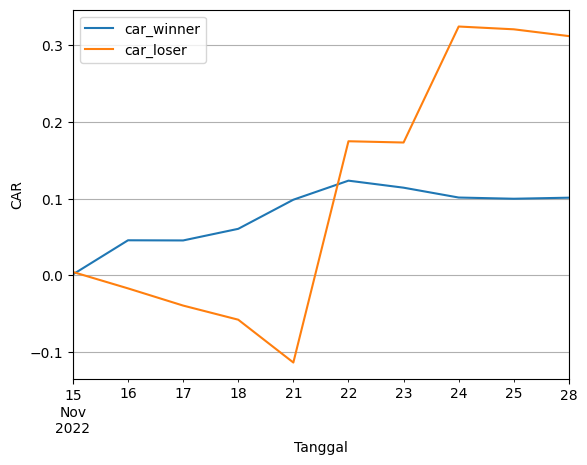

In [98]:
winner_loser_comparison.plot(ylabel='CAR', xlabel='Tanggal', grid=True)